
# kNN no *Iris Dataset*

Este notebook demonstra um fluxo completo de **classificação** usando o algoritmo **k-Nearest Neighbors (kNN)** no conjunto de dados **Iris**:

1. Carregar e inspecionar os dados  
2. Dividir em **treino** e **teste**  
3. Treinar com `fit` e prever com `predict`  
4. Avaliar a **acurácia**



## 1) Importações


In [9]:

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Import da classe KNN implementada no arquivo KNN.py
from KNN import KNN

# Garantir reprodutibilidade
RANDOM_STATE = 42



## 2) Carregar e inspecionar os dados


In [10]:

iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)
print("Classes:", iris.target_names)
X.head()


Formato de X: (150, 4)
Formato de y: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



## 3) Dividir em treino e teste

Usamos `train_test_split` com **estratificação** para manter a proporção das classes.


In [11]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Tamanho treino:", X_train.shape, " | Tamanho teste:", X_test.shape)


Tamanho treino: (120, 4)  | Tamanho teste: (30, 4)



## 4) Treinar o modelo (fit) e fazer previsões (predict)


In [12]:

k = 3  # você pode ajustar
knn = KNN(k=k, metric="euclidean")

# Treinar
knn.fit(X_train, y_train)

# Prever
y_pred = knn.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia (k={k}): {acc:.4f}")


Acurácia (k=3): 1.0000



## 5) Testando a votação ponderada por distância

Você pode reduzir empates e dar mais importância a vizinhos mais próximos configurando `weights='distance'`.


In [13]:

k = 3
knn_distance = KNN(k=k)

knn_distance.fit(X_train, y_train)
y_pred_d = knn_distance.predict(X_test)
acc_d = accuracy_score(y_test, y_pred_d)
print(f"Acurácia com weights='distance' (k={k}): {acc_d:.4f}")


Acurácia com weights='distance' (k=3): 1.0000


## 6) Testando a Distância de Manhattan (L1)

No kNN, além da distância Euclidiana (L2), podemos usar a **distância de Manhattan (L1)**, que soma os módulos das diferenças por atributo.  
Em `scikit-learn`, podemos configurá-la com `metric='manhattan'` (ou `metric='minkowski', p=1`).

In [15]:

k = 3
knn_l1 = KNN(k=k, metric="manhattan")

knn_l1.fit(X_train, y_train)
acc_l1 = accuracy_score(y_test, y_pred)
print(f"Acurácia com Distância de Manhattan (k={k}):  {acc_l1:.4f}")


Acurácia com Distância de Manhattan (k=3):  1.0000


## 7) Avaliando diferentes valores de *k* (distância Euclidiana)

Vamos varrer `k` de 1 a 30 usando kNN com **distância Euclidiana** (`metric='minkowski', p=2`) e observar a acurácia no conjunto de teste.

> Nota: estamos usando uma única divisão treino/teste. Para uma escolha mais robusta de `k`, prefira **validação cruzada**.


In [17]:
ks = np.arange(1, 31)  # k de 1 a 30
acc_l2_all = []

for k in ks:
    knn = KNN(k=k, metric="minkowski", p=2)
    
    knn.fit(X_train, y_train)
    acc_l2_all.append(accuracy_score(y_test, y_pred))

acc_l2_all = np.array(acc_l2_all)
best_k = ks[np.argmax(acc_l2_all)]
best_acc = acc_l2_all.max()

print(f"Melhor k (Euclidiana): {best_k} | Acurácia: {best_acc:.4f}")


Melhor k (Euclidiana): 1 | Acurácia: 1.0000


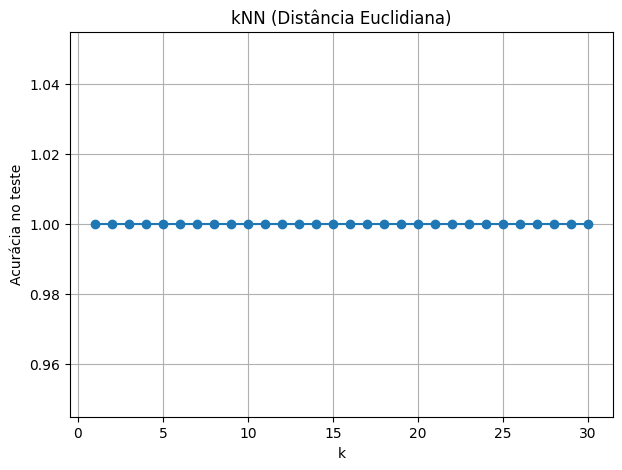

In [18]:

plt.figure(figsize=(7, 5))
plt.plot(ks, acc_l2_all, marker='o')
plt.xlabel('k')
plt.ylabel('Acurácia no teste')
plt.title('kNN (Distância Euclidiana)')
plt.grid(True)
plt.show()


## 8) Plot 2D de treinamento e teste (classes **preditas**)

Treinaremos o kNN usando **todas as 4 features** do Iris, mas para **visualização** projetaremos os pontos em **duas dimensões** (eixos do gráfico).  
Isso permite observar como as **classes preditas** se distribuem em 2D, mesmo que a decisão tenha sido tomada no espaço 4D.

Passos:
1. Treinar `Pipeline(StandardScaler + KNeighborsClassifier)` com **todas as features** (X\_train completo).
2. Prever no **teste** (y\_pred\_test).
3. Selecionar **duas colunas** de `X` apenas para **plotar** (ex.: `petal length (cm)` e `petal width (cm)`).
4. Plotar **treino** (marcador “o”) e **teste** (marcador “x”), **colorindo** pela **classe predita**.


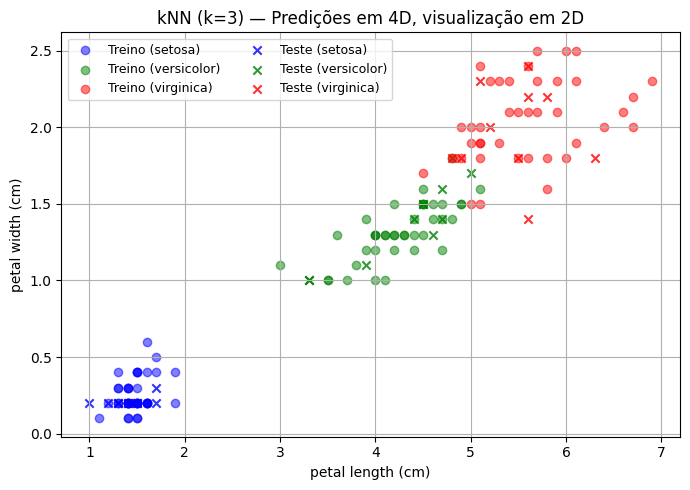

In [20]:
# 1) Treinar com todas as features
k = 3
knn2d = KNN(k=k, metric="minkowski", p=2)

knn2d.fit(X_train, y_train)

# 2) Predições no teste (no espaço de 4 features)
y_pred_test  = knn2d.predict(X_test)

# 3) Escolher duas features para PLOT (apenas visualização)
feature_x = 'petal length (cm)'
feature_y = 'petal width (cm)'

X2_train = X_train[[feature_x, feature_y]]
X2_test  = X_test[[feature_x, feature_y]]

# 4) Plotar: treino (o) e teste (x), coloridos pelas classes preditas
plt.figure(figsize=(7, 5))

# Para legenda clara, plotamos uma série por classe predita e por split (train/test)
classes = np.unique(y)  # [0,1,2]
class_names = iris.target_names  # ['setosa','versicolor','virginica']
colors = {0: "blue", 1: "green", 2: "red"}

# Treino (círculos)
for c in classes:
    sel = (y_train == c)
    plt.scatter(X2_train[feature_x][sel],
                X2_train[feature_y][sel],
                label=f"Treino ({class_names[c]})",
                alpha=0.5,
                marker='o',
                color=colors[c]
               )

# Teste (xis)
for c in classes:
    sel = (y_pred_test == c)
    plt.scatter(X2_test[feature_x][sel],
                X2_test[feature_y][sel],
                label=f"Teste ({class_names[c]})",
                alpha=0.8,
                marker='x',
                color=colors[c]
               )

# Verificando erros na predicao
# for c in classes:
#     sel = (y_test == c)
#     plt.scatter(X2_test[feature_x][sel],
#                 X2_test[feature_y][sel],
#                 label=f"Rótulo ({class_names[c]})",
#                 alpha=0.5,
#                 marker='^',
#                 color=colors[c]
#                )

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"kNN (k={k}) — Predições em 4D, visualização em 2D")
plt.legend(ncol=2, fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()
